# Adedoyin Simeon Adeyemi
### For: Kaggle Titanic Competition (Chose Random Forest Prediction)
    Date: 16th May,2019
    Email: adeyemi.sa1@gmail.com

*Note: Please reference the author whenever and wherever you use all/portion of this code*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
train_data = pd.read_csv('train.csv',index_col='PassengerId')

In [7]:
test_data = pd.read_csv('test.csv',index_col='PassengerId')

In [8]:
gender_sub = pd.read_csv('gender_submission.csv')

In [9]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [10]:
test_data.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Exploring the Datasets

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## Taking care of missing values

#### ================== Training Data ========================

In [14]:
train_data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [15]:
# Dropping Cabin because it contains too many Nulls to be filled, 
# and names and Ticket because they won't be so useful for the training

In [16]:
train_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [17]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [18]:
# Filling missing values in Age with Mean() of Age column and rounding up age to 1dp
# Filling missing values of Embarked with Mode() of Embarked Column

In [19]:
train_data.Age.fillna(train_data.Age.mean(), axis=0, inplace=True)

In [20]:
train_data.Age = train_data.Age.apply(lambda x: np.round(x,1))

In [21]:
train_data.Embarked.fillna(train_data.Embarked.mode()[0], axis=0, inplace=True)

In [22]:
train_data.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

In [23]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C


#### ==================== Test Data =====================

In [24]:
test_data.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [25]:
test_data.count()

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Cabin        91
Embarked    418
dtype: int64

In [26]:
# Dropping irrelevant columns and Cabin column with too many missing data

In [27]:
test_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [28]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [29]:
test_data.count()

Pclass      418
Sex         418
Age         332
SibSp       418
Parch       418
Fare        417
Embarked    418
dtype: int64

In [30]:
# Filling missing values in Age and Fare with Mean() of Age and Mean() of Fare columns respectively 
# and rounding up age to 1dp

In [31]:
test_data.Age.fillna(test_data.Age.mean(), axis=0, inplace=True)

In [32]:
test_data.Fare.fillna(test_data.Fare.mean(), axis=0, inplace=True)

In [33]:
test_data.Age = test_data.Age.apply(lambda x: np.round(x,1))

In [34]:
test_data.count()

Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Fare        418
Embarked    418
dtype: int64

# Exploratory Data Analysis, EDA (on Training dataset)

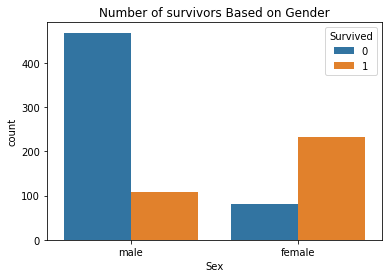

In [35]:
plt.title('Number of survivors Based on Gender')
sns.countplot(x="Sex",data=train_data,hue="Survived")

## Analysis:
From the above chart Most of the male passengers died while most of the female passengers survived.

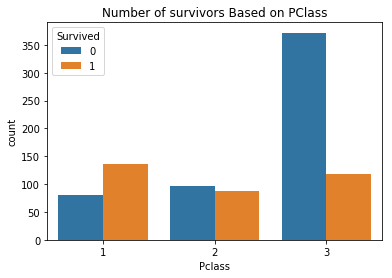

In [36]:
plt.title('Number of survivors Based on PClass')
sns.countplot(x="Pclass",data=train_data,hue="Survived")

## Analysis
Majority of the passengers who boarded 3rd Class died

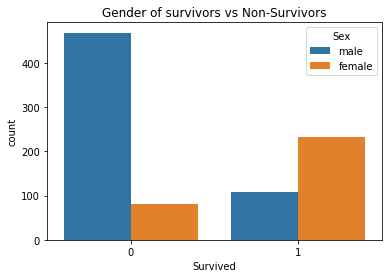

In [37]:
plt.title('Gender of survivors vs Non-Survivors')
sns.countplot(x="Survived",data=train_data,hue="Sex")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


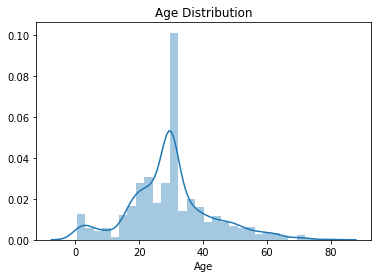

In [38]:
plt.title('Age Distribution')
sns.distplot(train_data.Age)

# Analysis:
Majority of the passengers are Youth 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


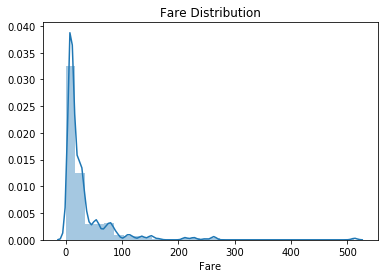

In [39]:
plt.title('Fare Distribution')
sns.distplot(train_data.Fare,bins=30)

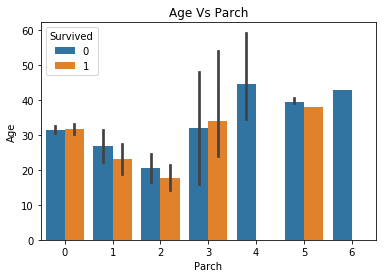

In [40]:
plt.title('Age Vs Parch')
sns.barplot(x='Parch', y='Age',data=train_data,hue='Survived')

## Analysis:
    * Everyone in Parch 4 and parch 6 containing only elderly people (>=40) did not survive
    * Almost half of the passengers in the remaining Parches, mostly youth (aged btw 18 and 40) survived

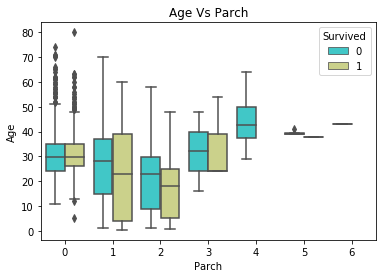

In [41]:
plt.title('Age Vs Parch')
sns.boxplot(x='Parch', y='Age',data=train_data,hue='Survived',palette='rainbow')

In [42]:
correlation = train_data.corr()

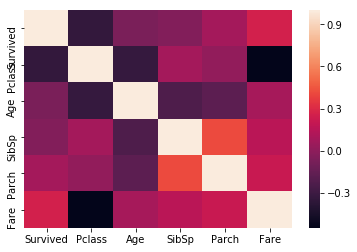

In [43]:
sns.heatmap(correlation)

# More Preprocessing: Encoding 
Encoding categorical independent variables, Pclass, Sex, SibSp, Parch and Embarked

In [44]:
from pandas import get_dummies

### =================== Encoding Training and Test dataset ====================

In [45]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [46]:
# Training Set Encoding
#pclass_train = get_dummies(train_data.Pclass)
gender_train = get_dummies(train_data.Sex)
#sibsp_train = get_dummies(train_data.SibSp)
#parch_train = get_dummies(train_data.Parch)
embarked_train = get_dummies(train_data.Embarked)

In [47]:
# Test Set Encoding
#pclass_test = get_dummies(test_data.Pclass)
gender_test = get_dummies(test_data.Sex)
#parch_test = get_dummies(test_data.Parch)
embarked_test = get_dummies(test_data.Embarked)

## ------------ Training Encoded-----------

In [48]:
#pclass_train.head(2)

In [49]:
gender_train.head(2)

,female,male
PassengerId,,
1,0,1
2,1,0


In [50]:
#parch_train.head(2)

In [51]:
embarked_train.head(2)

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0


## ------------ Test Encoded -----------

In [52]:
#pclass_test.head(2)

In [53]:
gender_test.head(2)

,female,male
PassengerId,,
892,0,1
893,1,0


In [54]:
#parch_test.head(2)

In [55]:
embarked_test.head(2)

,C,Q,S
PassengerId,,,
892,0,1,0
893,0,0,1


### =================== Removing First Column(s) to solve Multi-colinearity Problem ====================
To Solve the problem of Multicolinearity, There is need to drop one of the columns of the encoded 
variables since one determines the other(s)

In [56]:
# Training encoded variables
#pclass_train.drop(1, axis=1, inplace=True)
gender_train.drop('female', axis=1, inplace=True)
#sibsp_train.drop(0, axis=1, inplace=True)
#parch_train.drop(0, axis=1, inplace=True)
embarked_train.drop('C', axis=1, inplace=True)

In [57]:
# Test encoded variables
#pclass_test.drop(1, axis=1, inplace=True)
gender_test.drop('female', axis=1, inplace=True)
#sibsp_test.drop(0, axis=1, inplace=True)
#parch_test.drop(0, axis=1, inplace=True)
embarked_test.drop('C', axis=1, inplace=True)

### ====== Replacing the Original Variables with the encoded ones ===========

In [58]:
# Dropping original Columns
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)
test_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [59]:
# Adding the Encoded Columns
train_data = pd.concat([train_data, gender_train, embarked_train], axis=1)
test_data = pd.concat([test_data, gender_test, embarked_test], axis=1)

In [60]:
train_data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1


In [61]:
test_data.head(3)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,0
893,3,47.0,1,0,7.0000,0,0,1
894,2,62.0,0,0,9.6875,1,1,0


In [62]:
#test_data.drop(9,axis=1,inplace=True)

In [63]:
#test_data.head(3)

# Splitting the Training data set into X (independent) and y (dependent) Variables

In [64]:
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

In [65]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,1
2,1,38.0,1,0,71.2833,0,0,0
3,3,26.0,0,0,7.9250,0,0,1


In [66]:
y.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

# Scaling:
The Independent Variables X dataset to enable Models that depend on distance measurement for classfication to do well

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scale = StandardScaler()

In [69]:
scaled_x_train = scale.fit_transform(X)
scaled_test_set = scale.transform(test_data)

In [70]:
scaled_x_train = pd.DataFrame(data=scaled_x_train, index=X.index, columns=X.columns)
scaled_test_set = pd.DataFrame(data=scaled_test_set, index=test_data.index, columns=test_data.columns)

In [71]:
scaled_x_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
1,0.827377,-0.592500,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838
2,-1.566107,0.638777,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803
3,0.827377,-0.284681,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838
4,-1.566107,0.407912,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838
5,0.827377,0.407912,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838


In [72]:
scaled_test_set.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
892,0.827377,0.369435,-0.474545,-0.473674,-0.490783,0.737695,3.251373,-1.623803
893,0.827377,1.331370,0.432793,-0.473674,-0.507479,-1.355574,-0.307562,0.615838
894,-0.369365,2.485692,-0.474545,-0.473674,-0.453367,0.737695,3.251373,-1.623803
895,0.827377,-0.207726,-0.474545,-0.473674,-0.474005,0.737695,-0.307562,0.615838
896,0.827377,-0.592500,0.432793,0.767630,-0.401017,-1.355574,-0.307562,0.615838


# ---------------------------------------------
# Building Models
# ---------------------------------------------

In [73]:
# Importing Models module from sklearn

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

##  ============ Temporary Evaluation with Train_Test_Split ===============

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x_train, y, test_size=0.33, random_state=101)

In [77]:
d_tree = DecisionTreeClassifier(criterion='entropy')

In [78]:
rnd_forest = RandomForestClassifier(n_estimators=300, criterion='entropy')

In [79]:
# The need for grid_search for param tunning of SVC
from sklearn.model_selection import GridSearchCV

In [80]:
params_svc = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid_svc = GridSearchCV(SVC(), param_grid=params_svc, scoring='accuracy')

In [81]:
params_knn = {'n_neighbors': list(range(1,50))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params_knn, scoring='accuracy')

In [82]:
# Temporary Training with Splitted Training Set

In [83]:
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
rnd_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [87]:
grid_knn.best_params_

{'n_neighbors': 10}

In [88]:
grid_svc.best_params_

{'C': 10, 'gamma': 0.01}

In [89]:
# Predictions

In [90]:
dt_pred = d_tree.predict(X_test)

In [91]:
rndFor_pred = rnd_forest.predict(X_test)

In [92]:
knn_pred = grid_knn.predict(X_test)

In [93]:
svc_pred = grid_svc.predict(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [95]:
print('DTree')
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
print(accuracy_score(y_test,dt_pred))
print('\n\n')

print('Random Forest')
print(confusion_matrix(y_test,rndFor_pred))
print(classification_report(y_test,rndFor_pred))
print(accuracy_score(y_test,rndFor_pred))
print('\n\n')

print('KNN')
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))
print('\n\n')

print('SVC')
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
print(accuracy_score(y_test,svc_pred))
print('\n\n')

DTree
[[148  21]
 [ 38  88]]
             precision    recall  f1-score   support

          0       0.80      0.88      0.83       169
          1       0.81      0.70      0.75       126

avg / total       0.80      0.80      0.80       295

0.8



Random Forest
[[149  20]
 [ 37  89]]
             precision    recall  f1-score   support

          0       0.80      0.88      0.84       169
          1       0.82      0.71      0.76       126

avg / total       0.81      0.81      0.80       295

0.8067796610169492



KNN
[[157  12]
 [ 46  80]]
             precision    recall  f1-score   support

          0       0.77      0.93      0.84       169
          1       0.87      0.63      0.73       126

avg / total       0.81      0.80      0.80       295

0.8033898305084746



SVC
[[152  17]
 [ 42  84]]
             precision    recall  f1-score   support

          0       0.78      0.90      0.84       169
          1       0.83      0.67      0.74       126

avg / total       0.80 

# ---------------------------------------------------------------------------------------
# ACTUAL MODEL TRAINING WITH GIVEN TEST DATA
# ---------------------------------------------------------------------------------------

### Initializations / Instantiations

In [233]:
d_tree = DecisionTreeClassifier(criterion='entropy')

In [234]:
rnd_forest = RandomForestClassifier(criterion='entropy')

In [235]:
params_knn = {'n_neighbors': list(range(1,100))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params_knn, scoring='accuracy')

In [236]:
params_svc = {'C':[0.1,0.5,1,5,10,50,100,500,1000,],'gamma':[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
grid_svc = GridSearchCV(SVC(), param_grid=params_svc, scoring='accuracy')

### Actual Training

In [237]:
d_tree.fit(scaled_x_train, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [238]:
rnd_forest.fit(scaled_x_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [239]:
grid_knn.fit(scaled_x_train, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [240]:
grid_svc.fit(scaled_x_train, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [241]:
grid_knn.best_params_

{'n_neighbors': 18}

In [242]:
grid_svc.best_params_

{'C': 5, 'gamma': 0.05}

### Using Models to Make Predictions from Test Data

In [243]:
dt_pred = d_tree.predict(scaled_test_set)

In [244]:
rndFor_pred = rnd_forest.predict(scaled_test_set)

In [245]:
knn_pred = grid_knn.predict(scaled_test_set)

In [246]:
svc_pred = grid_svc.predict(scaled_test_set)

# Results Obtained From Each Model

In [247]:
result = pd.DataFrame(data=list(zip(dt_pred, rndFor_pred, knn_pred, svc_pred)), 
                      index=scaled_test_set.index, 
                      columns=['DTree','Rnd Forest','KNN','SVC'])

In [248]:
result

,DTree,Rnd Forest,KNN,SVC
PassengerId,,,,
892,0,0,0,0
893,0,0,1,0
894,1,0,0,0
895,0,0,0,0
896,1,0,0,0
897,1,0,0,0
898,1,0,1,1
899,1,0,0,0
900,0,1,1,1


In [249]:
# Judging from previous evalution from using train_test_split
best_model_prediction = result.SVC.values
best_model_prediction2 = result['Rnd Forest'].values

In [250]:
my_prediction = pd.DataFrame(data=best_model_prediction2, index=result.index, columns=['Survived'])

In [251]:
my_prediction.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


## Writing result to file in CSV Format

In [252]:
my_prediction.to_csv('Adedoyin_Simeon_Titanic_Prediction_for_Kaggle_competition2.csv')

## Verifying Result File

In [254]:
pred = pd.read_csv('Adedoyin_Simeon_Titanic_Prediction_for_Kaggle_competition2.csv', index_col='PassengerId')

In [255]:
pred.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


# Visualizing the models

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot

# ==================== THE END ===========================